## Name Of Dataset :- Heart Disease Classification
### Type of Dataset :- Classification
### Model Built :- Logistic, SVC, Decision Tree, Random Forest, Bagging, XGboosting, Hyperparameter Tuning, ANN

# Importing The Libaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatible.


In [ ]:
!pip install summarytools

In [ ]:
from skimpy import skim
from summarytools import dfSummary

# Insert the Dataset

In [ ]:
data= pd.read_csv("heart (1) (2).csv")

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#Domain Analysis

'Age' :- Age in years

'Sex' :- Sex (1 = male; 0 = female)

'ChestPainType' :- Chest pain type (4 values)

'RestingBP' :- Resting blood pressure (in mm Hg on admission to the hospital)

'Cholesterol':- Serum cholesterol in mg/dl

'FastingBS' :- Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

'RestingECG' :- Resting electrocardiographic results (values 0,1,2)

'MaxHR' :- Maximum heart rate achieved

'ExerciseAngina':- Exercise-induced angina (1 = yes; 0 = no)

'Oldpeak':- ST depression induced by exercise relative to rest

'ST_Slope' :- Slope of the peak exercise ST segment (3 values)

'HeartDisease' :- Heart disease (0 = no, 1 = yes)

# Basic checks

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
data.describe(include="object").T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [ ]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age[int64],Mean (sd) : 53.5 (9.4)min < med < max:28.0 < 54.0 < 77.0IQR (CV) : 13.0 (5.7),50 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAClUlEQVR4nO3dQY6iQBSA4VdDa1ATiDHRnReYpBcuPcQcdo4wC0/gDdyZGIKRaSIivZh04kx6uhGotl7xf3tsFn8bgaqHqapKANd9e/QJAHU8PfoEfGSMGYnIsOHh56qqXro8Hx8QaseMMaPZbPYjiqJpk+OPx2NijPlJrH8j1O4NoyiartfrlziO83sOTNM03Gw208PhMBQRQr1BqJbEcZzP5/PfDQ4ddX4yHuBiCioQKlQgVKhAqFCBUKECV/2OKctyICKRMabpR3j5wIBQHZJl2aAoiuflchkEQXDXPdg3vj4wIFSHnM/npzAMx6vVKl8sFsm9x/v8wIBQHTSZTJo+LBDx9IEBF1NQgVChAqFCBUKFCoQKFbjq/48Wq/Sj6/U66Pp8+o5Q39FmlX5RFGFZlt/zPP8lIk1vMeEfhPq+xqv0d7vddLvdji+XS2Dr5PqIUD/QZJV+kiRe3nB/NC6moAKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUK3j7rbzlMl6V6jvEy1LbDdDUv1Ws5wMLZ4RVehiotlumJ6F2q13aAhcvDK3wNVUSaD9PVulSvzQAL14dXeB1qX7UYYOHsP6jTobJvCW+cDZV9S7jlbKjCviXccDlUEWHfEv7gyRRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoYLzi1LwdVx+YbDVUNkJqofrLwy2Fmqfd4Jq5PoLg21+o/ZyJ6h2rr4w2Ppv1L7tBIUdXPVDBUKFCoQKFbiPis7YnHv1aagMgUAdtudefRgqQyBQl+25V599ozIEAnexNfeq1m9UhkDg0WqFmqZpeO8Hn06nUEQky7Jwv9+Pv/J4rX9b63m3Pb5OX6/+sLLp9hMoWwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Sex[object],1. M2. F,725 (79.0%)193 (21.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABNUlEQVR4nO3bwYnDMBCF4dFiwuYiYQwuxkVssVuEujHGOiQhF+WQGvRmwP9XwUD+BGL8Uu/dAIVkZnczu3kfguHevfen5wHTsix/OefZ8wiM11o7Ukr/nsFNOed527ZnKeXldQTGOs/zt9Y67/t+MzO/2MzMSimvdV0fXkdA4u59wI/3AbgOYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZCaz78t13odgnCif79RaO2qtswV4uQ7jtNYOM3t73sDg5TrcBy+JKR9UovyyuX/rMF6IKV+EmRnGc5/yRZmZYbwoUz7+CV8AD3UhQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig4z7lC/KzAzjhZjyRZiZYTwGL5D5AApbat9q39BWAAAAAElFTkSuQmCC"">",0(0.0%)
3,ChestPainType[object],1. ASY2. NAP3. ATA4. TA,496 (54.0%)203 (22.1%)173 (18.8%)46 (5.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB70lEQVR4nO3bQWrbUBiF0V/FhGYiYQxejBfRxXYR2o0x1iAJmSiDzlrqZCDuU6RzNuCH+ZCQ0O3meS5I+NH6AOyH2Ijpquq5qp5aH2RD3ud5fm19iDU6nE6nX33fH1sfZCumabp1XfdbcP869H1/vFwur8MwvLU+zHd3v99/juN4vF6vT1Ultr8cqqqGYXg7n88vrQ+zEc+tD7BWHhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhD1Z9PY1ofZAv8j48dpmm6jeN4LJ/GLGKapltVvbc+xxr5LHx5Pgv/j86UjxQPCMSs6Tbq9rNxq1lXWSVt3yrWVVZJ+7CmdZVXLxvnAYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMauY8rX+fTJWM+Uzgds+GwRiTPmIaXVlcxXboSbrKkuqfYqvqyyp9qvVusqSaoe81CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGTHxdZUm1X03WVZZU+2SDQIx1FTFfubK5CrGIT9dVllAs5eG6yhKKJX1lXWUJxSK81CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGzMN1lSUUS/p0XWUJxVJsEIixriLGAwIxH7NY2LncjNTWAAAAAElFTkSuQmCC"">",0(0.0%)
4,RestingBP[int64],Mean (sd) : 132.4 (18.5)min < med < max:0.0 < 130.0 < 200.0IQR (CV) : 20.0 (7.2),67 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACU0lEQVR4nO3dP47aQBiG8W/CwtqAbCEU6LhAJApKDpHD5ggpOAHtVnQWCBnhrIMxThdppUSJ/wm/1vPrB0/xNAP4G1cUhQFd9+nZGwD+x8uzN4CPnHO+mY1qfMStKIr3pvbTFYTaIc45fz6ffw2CYFb1My6Xy9k5961vsRJqt4yCIJhtt9v3MAzTsovjOPZ2u93sdDqNzIxQ0a4wDNPFYvGj4nK/0c10BIcpSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSGD2VM/keT40s8A5V2V5Z0dWEmqPJEkyzLJsvVqtBoPBoPQ0wC6PrCTUHrndbi+e5403m026XC7PZdZ2fWQlofbQZDKpOraysyMrOUxBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAr9MtaDGfabB4/EYNr2fPiDUhtW5zzTLMi/P8y9pmn43s6o39/USoTav8n2mh8Nhtt/vx/f7fdDW5lQRakuq3Gd6Pp87+6eQZ+MwBQmECgmECgmECgmECgmECgmECgmECgl84Y/fag6vMGtxgAWhwszqD68wa3eABaHCzOoNrzBrf4AFoeKDGsMrzFocYMFhChIIFRIIFRIIF

In [ ]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 918    │ │ int64       │ 6     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0     ┃ p25     ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Age              │    0 │      0 │    53.51 │    9.433 │     28 │      47 │    54 │   60 │    77 │ ▁▃▅▇▅▁  │  │
│ │ RestingBP        │    0 │      0 │    132.4 │    18.51 │      0 │     120 │   130 │  140 │   200 │    ▇▆▁  │  │
│ │ Cholesterol      │    0 │      0 │    198.8 │    109.4 │      0 │   173.2 │   223 │  267 │   603 │  ▃▂▇▁   │  │
│ │ FastingBS        │    0 │      0 │   0.2331 │    0.423 │      0 │       0 │     0 │    0 │     1 │ ▇    ▂  │  │
│ │ MaxHR            │    0 │      0 │    136.8 │    25.46 │     60 │     120 │   138 │  156 │   202 │  ▃▇▇▆▁  │  │
│ │ Oldpeak          │    0 │      0 │   0.8874 │    1.067 │   -2.6 │       0 │   0.6 │  1.5 │   6.2 │   ▇▆▃   │  │
│ │ HeartDisease     │    0 │      0 │   0.5534 │   0.4974 │      0 │       0 │     1 │    1 │     1 │ ▆    ▇  │  │
│ └──────────────────┴──────┴────────┴──────────┴──────────┴────────┴─────────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Sex                           │      0 │          0 │                           1 │                    918 │  │
│ │ ChestPainType                 │      0 │          0 │                           1 │                    918 │  │
│ │ RestingECG                    │      0 │          0 │                           1 │                    918 │  │
│ │ ExerciseAngina                │      0 │          0 │                           1 │                    918 │  │
│ │ ST_Slope                      │      0 │          0 │                           1 │                    918 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
# As per the medical guidance Cholesterol and RestingBP of a person cant be zero
x=data[data["Cholesterol"]==0]
x.shape

(172, 12)

In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.duplicated().sum()

0

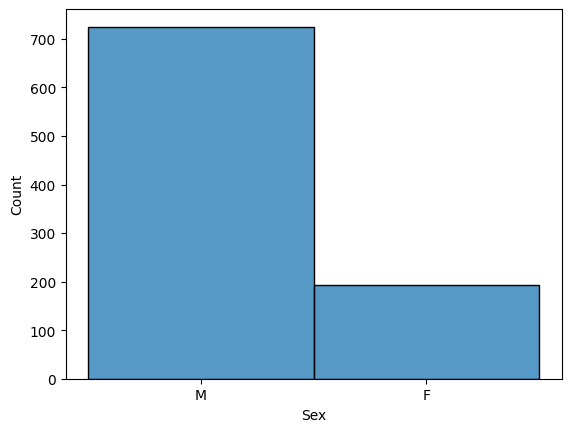

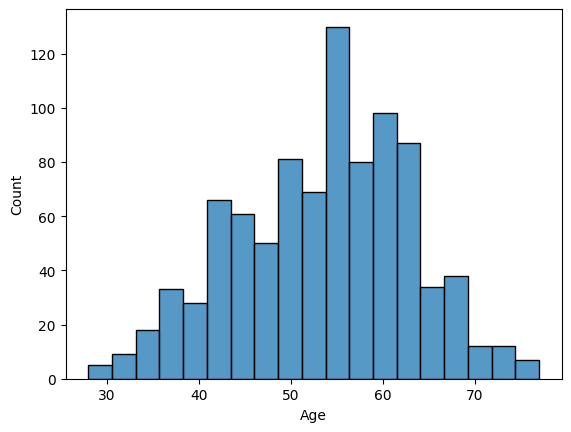

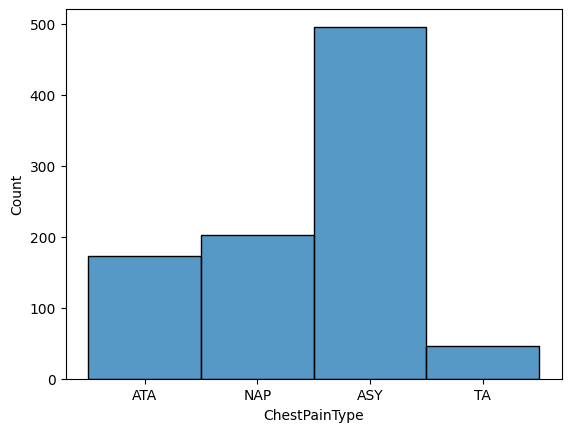

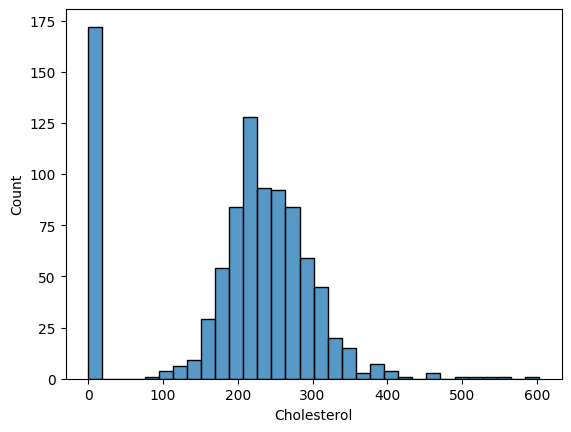

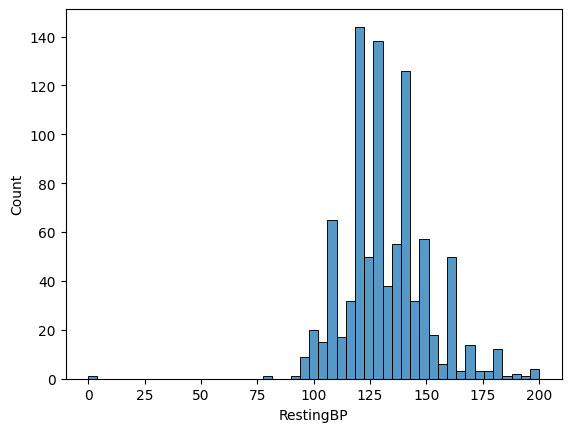

In [ ]:
# Data Analysis
x= data[["Sex","Age","ChestPainType","Cholesterol","RestingBP"]]
for i in x.columns:
  sns.histplot(data=x,x=i)
  plt.show()

Insight:

1. As compare to male and female male count are more than 2 times than female count
2. As compare to ChestPainType Asy count is larges than other type
3. Maximum heart disease is in age betweent 40 to 60

# Data Preprocessing

In [ ]:
# As we get an insight from data that Cholesterol and RestingBP of a person cant be zero i.e now replace the zero values with median

In [ ]:
data["Cholesterol"].replace(0,data["Cholesterol"].median(),inplace=True)

# Cross Check
x=data[data["Cholesterol"]==0]
x.shape

(0, 12)

In [ ]:
data.loc[data['RestingBP']==0,'RestingBP'] = data['RestingBP'].median()

# Cross Check
x=data[data["RestingBP"]==0]
x.shape

(0, 12)

In [ ]:
# Encoding
data["ChestPainType"]=data["ChestPainType"].map({"TA":0,"ATA":1,"NAP":2,"ASY":3})
data["RestingECG"]=data["RestingECG"].map({"Normal":0,"ST":1,"LVH":2})
data["ExerciseAngina"]=data["ExerciseAngina"].map({"Y":1,"N":0})
data["ST_Slope"]=data["ST_Slope"].map({"Up":0,"Flat":1,"Down":2})

In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [ ]:
df1 = pd.get_dummies(data['Sex'],prefix = 'Sex',drop_first = True,dtype='int')
data = pd.concat([data,df1],axis=1).drop('Sex',axis=1)

In [ ]:
data.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,1,140,289,0,0,172,0,0.0,0,0,1
1,49,2,160,180,0,0,156,0,1.0,1,1,0
2,37,1,130,283,0,1,98,0,0.0,0,0,1
3,48,3,138,214,0,0,108,1,1.5,1,1,0
4,54,2,150,195,0,0,122,0,0.0,0,0,1


<Axes: >

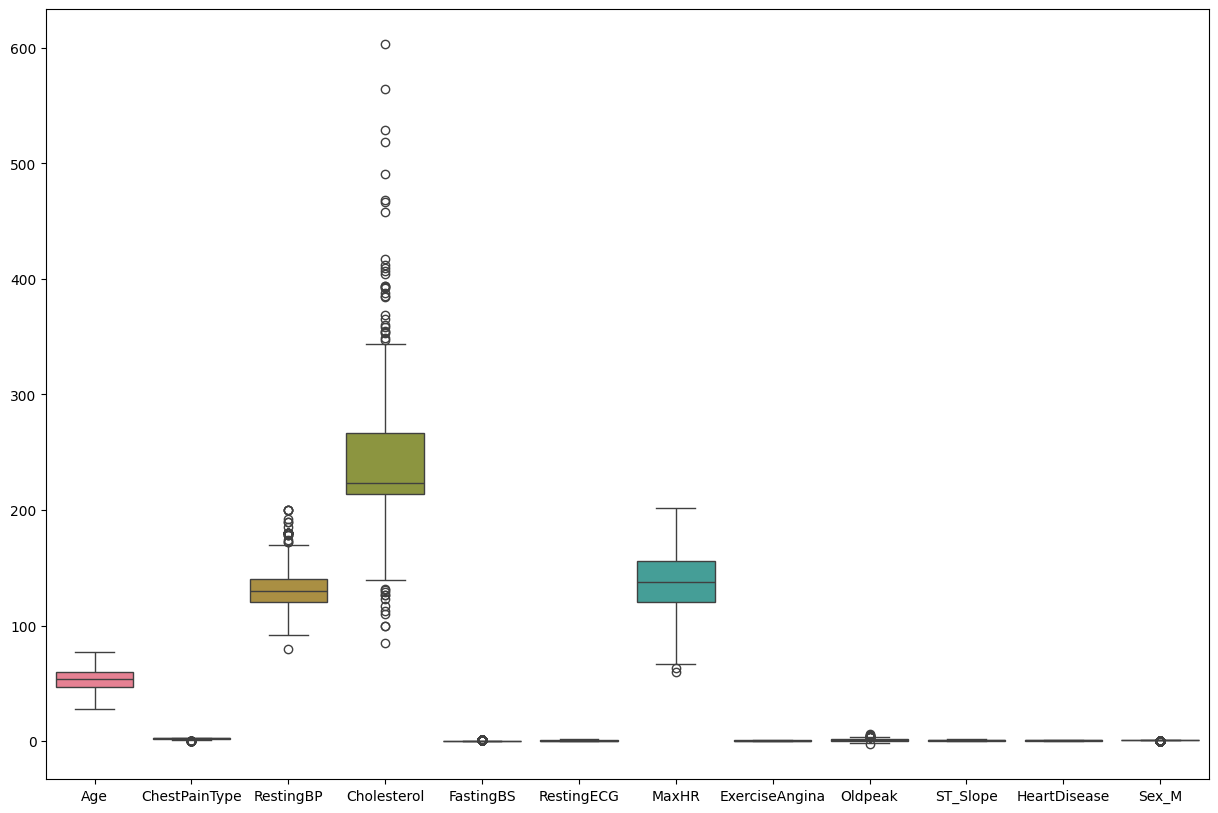

In [ ]:
#checking for outlier
plt.figure(figsize=(15,10))
sns.boxplot(data=data)

In [ ]:
#Insight :- Hence we get an outlier in Cholesterol, RestingBP, MaxHR and Oldpeak
data2= data[["Cholesterol","RestingBP", "MaxHR","Oldpeak"]]

In [ ]:
# Removing the outliers
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data2 < (Q1 - 1.5 * IQR)) |(data2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
#Scaling The dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d1=["HeartDisease"]
df= scaler.fit_transform(data.drop(d1,axis=1))
df=pd.DataFrame(df,columns= ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.408710,-1.302018,0.584757,1.311945,-0.549282,-0.742330,1.375178,-0.802746,-0.853392,-1.035783,0.510433
1,-0.455696,-0.235688,1.854714,-1.378564,-0.549282,-0.742330,0.741921,-0.802746,0.176585,0.641104,-1.959120
2,-1.726381,-1.302018,-0.050222,1.163844,-0.549282,0.505321,-1.553636,-0.802746,-0.853392,-1.035783,0.510433
3,-0.561586,0.830641,0.457761,-0.539323,-0.549282,-0.742330,-1.157850,1.245724,0.691574,0.641104,-1.959120
4,0.073756,-0.235688,1.219735,-1.008311,-0.549282,-0.742330,-0.603750,-0.802746,-0.853392,-1.035783,0.510433


# Model Creating

In [ ]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data['HeartDisease'], test_size=0.2, random_state=42)

In [ ]:
data["HeartDisease"].value_counts()

HeartDisease
1    454
0    383
Name: count, dtype: int64

In [ ]:
#Balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
Counter(y_train)

Counter({1: 357, 0: 357})

## Model Building
### SVC

In [ ]:
# Algorithm
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
print("Confusion_matrix",confusion_matrix(y_test,y_pred))
print("accuracy_score: ",accuracy_score(y_test,y_pred))
print("recall_score: ",recall_score(y_test,y_pred))
print("precision_score: ",precision_score(y_test,y_pred))
print("f1_score: ",f1_score(y_test,y_pred))

Confusion_matrix [[64  7]
 [10 87]]
accuracy_score:  0.8988095238095238
recall_score:  0.8969072164948454
precision_score:  0.925531914893617
f1_score:  0.9109947643979057


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_pred= lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score
print("Confusion_matrix",confusion_matrix(y_test,lr_pred))
print("accuracy_score: ",accuracy_score(y_test,lr_pred))
print("recall_score: ",recall_score(y_test,lr_pred))
print("precision_score: ",precision_score(y_test,lr_pred))
print("f1_score: ",f1_score(y_test,lr_pred))

Confusion_matrix [[63  8]
 [15 82]]
accuracy_score:  0.8630952380952381
recall_score:  0.845360824742268
precision_score:  0.9111111111111111
f1_score:  0.8770053475935828


### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rnd_pred= rf.predict(X_test)

In [ ]:
print("Confusion_matrix",confusion_matrix(y_test,rnd_pred))
print("accuracy_score: ",accuracy_score(y_test,rnd_pred))
print("recall_score: ",recall_score(y_test,rnd_pred))
print("precision_score: ",precision_score(y_test,rnd_pred))
print("f1_score: ",f1_score(y_test,rnd_pred))

Confusion_matrix [[63  8]
 [ 9 88]]
accuracy_score:  0.8988095238095238
recall_score:  0.9072164948453608
precision_score:  0.9166666666666666
f1_score:  0.9119170984455958


### Hyperparameter tuning

In [ ]:
param_grid = {'C':[1,5,10,50,60,70],
              'gamma':[0.1,0.01,0.001,0.02,0.032,0.001],
              'random_state':list(range(1,20))}

In [ ]:
from sklearn.model_selection import GridSearchCV
svc = SVC()

grid = GridSearchCV(svc,param_grid,cv=5,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 60, 70],
                         'gamma': [0.1, 0.01, 0.001, 0.02, 0.032, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
 grid.best_params_

{'C': 60, 'gamma': 0.01, 'random_state': 1}

In [ ]:
model1 = SVC(C=60,gamma=0.01,random_state=1)
model1.fit(X_train,y_train)

SVC(C=60, gamma=0.01, random_state=1)

In [ ]:
y_pred1 = model1.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.9047619047619048

In [ ]:
# Random SearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier(random_state=42)
ran_grid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy',
                             n_iter=100, verbose=1,cv=3,n_jobs = -1)
ran_grid.fit(X_train,y_train)
ran_grid.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [ ]:
model2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 10,min_samples_leaf= 2,
 max_features = 'auto',max_depth =  60,bootstrap = True)

model2.fit(X_train,y_train)

RandomForestClassifier(max_depth=60, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200)

In [ ]:
# check the accuracy
y_pred2 = model2.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8928571428571429

### Bagging :- SVC

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
base_estimator = SVC()
bagging_model = BaggingClassifier(base_estimator=base_estimator,n_estimators=100,bootstrap= True)
bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=100)

In [ ]:
predic = bagging_model.predict(X_test)

accuracy_score(y_test,predic)

0.8928571428571429

### XGBoosting :- Random Forest

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred3 = xgb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.875

### ANN

In [ ]:
# Model Training
x= data.drop(["HeartDisease"],axis=1)
y= data["HeartDisease"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# model Creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,40),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) ## model object creation max_iter=Stopping parameter

model.fit(X_train,y_train) ## training the data

MLPClassifier(hidden_layer_sizes=(50, 40), learning_rate_init=0.1, max_iter=100,
              random_state=2)

In [ ]:
y_predict_proba = model.predict_proba(X_test) ## predicting the probability of class
#test data predictin
y_predict_test = model.predict(X_test)
#train data predict
y_train_predict = model.predict(X_train)

In [ ]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix

print("Train accuracy :",accuracy_score(y_train,y_train_predict))

print("Test accuracy :",accuracy_score(y_test,y_predict_test))

Train accuracy : 0.8191330343796711
Test accuracy : 0.7976190476190477


In [ ]:
## getting the confusion matrix
pd.crosstab(y_test,y_predict_test)

col_0,0,1
HeartDisease,,
0,66,5
1,29,68


## ANN Model II

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [ ]:
data.shape

(837, 12)

In [ ]:
model = Sequential()

model.add(Dense(20,activation='relu',kernel_regularizer=regularizers.l2(0.01),input_shape=(11,)))
model.dropouts(0.2)
model.add(Dense(40,activation='relu'))
model.dropouts(0.2)
model.add(Dense(30,activation='relu'))
model.dropouts(0.2)
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 20)                240       
                                                                 
 dense_18 (Dense)            (None, 1)                 21        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 1s 27ms/step - loss: 67.9986 - accuracy: 0.4729 - val_loss: 65.1055 - val_accuracy: 0.4403
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 52.8228 - accuracy: 0.4729 - val_loss: 48.6421 - val_accuracy: 0.4403
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 37.6925 - accuracy: 0.4729 - val_loss: 32.6343 - val_accuracy: 0.4403
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 23.2589 - accuracy: 0.4729 - val_loss: 16.8347 - val_accuracy: 0.4403
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 9.0273 - accuracy: 0.4953 - val_loss: 3.4708 - val_accuracy: 0.5373
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 3.5419 - accuracy: 0.6019 - val_loss: 4.6393 - val_accuracy: 0.5746
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 4.3417 - accuracy: 0.5626 - val_loss: 3.1990 - val_accuracy: 0.5522
Epoch 8/100
9/9 [=

In [ ]:
y_pred= model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:

y_pred = y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4226190476190476

In [ ]:
## getting the confusion matrix
pd.crosstab(y_test,y_predict_test)

col_0,0,1
HeartDisease,,
0,66,5
1,29,68
